<a href="https://colab.research.google.com/github/Sisombath/data-bootcamp-batch10/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd

In [115]:
#import data
df = pd.read_csv('df_Orders.csv')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       89316 non-null  object
 1   customer_id                    89316 non-null  object
 2   order_status                   89316 non-null  object
 3   order_purchase_timestamp       89316 non-null  object
 4   order_approved_at              89307 non-null  object
 5   order_delivered_timestamp      87427 non-null  object
 6   order_estimated_delivery_date  89316 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


In [117]:
#how many orders
df['order_id'].nunique()

89316

In [118]:
#change format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_timestamp'] = pd.to_datetime(df['order_delivered_timestamp'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89316 non-null  object        
 1   customer_id                    89316 non-null  object        
 2   order_status                   89316 non-null  object        
 3   order_purchase_timestamp       89316 non-null  datetime64[ns]
 4   order_approved_at              89307 non-null  datetime64[ns]
 5   order_delivered_timestamp      87427 non-null  datetime64[ns]
 6   order_estimated_delivery_date  89316 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 4.8+ MB


In [120]:
df['year'] = df['order_purchase_timestamp'].dt.year
df['month'] = df['order_purchase_timestamp'].dt.month
df['day'] = df['order_purchase_timestamp'].dt.day
df['day_of_week'] = df['order_purchase_timestamp'].dt.dayofweek
df['day_name'] = df['order_purchase_timestamp'].dt.strftime('%A')
df['hour'] = df['order_purchase_timestamp'].dt.hour
df['timeday'] = pd.cut(df['order_purchase_timestamp'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Dawn', 'Morning', 'Afternoon', 'Night'])

In [121]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,year,month,day,day_of_week,day_name,hour,timeday
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,2017,10,22,6,Sunday,18,Afternoon
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,2018,6,20,2,Wednesday,21,Night
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,2018,2,16,4,Friday,16,Afternoon
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,2018,8,18,5,Saturday,18,Afternoon
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,2017,12,22,4,Friday,16,Afternoon


In [122]:
# sort and group orders
dayname = df.groupby('day_name')['order_id'].nunique().sort_values(ascending=False)
timeday = df.groupby('timeday')['order_id'].nunique().sort_values(ascending=False)
print(dayname.head())
print(timeday.head())

day_name
Tuesday      14592
Monday       14416
Wednesday    13919
Thursday     13458
Friday       12781
Name: order_id, dtype: int64
timeday
Afternoon    34184
Night        25230
Morning      25103
Dawn          2600
Name: order_id, dtype: int64


<ipython-input-122-76bd0f1c57f0>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  timeday = df.groupby('timeday')['order_id'].nunique().sort_values(ascending=False)


In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

#Group by day_name and timeday and count orders
group_data = df.groupby(['day_name', 'timeday'])['order_id'].count().reset_index(name='order_count')

group_data.head()

<ipython-input-123-97df8b1f3b00>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = df.groupby(['day_name', 'timeday'])['order_id'].count().reset_index(name='order_count')


,day_name,timeday,order_count
0,Friday,Dawn,423
1,Friday,Morning,3902
2,Friday,Afternoon,4978
3,Friday,Night,3076
4,Monday,Dawn,309


In [124]:
#Pivot the DataFrame
pivot_data = group_data.pivot(index='timeday', columns='day_name', values='order_count')

pivot_data.head()

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
timeday,,,,,,,
Dawn,423,309,400,305,403,344,416
Morning,3902,3968,2499,2338,4138,4116,4142
Afternoon,4978,5543,3723,3902,5060,5645,5333
Night,3076,4287,2706,3756,3516,4214,3675


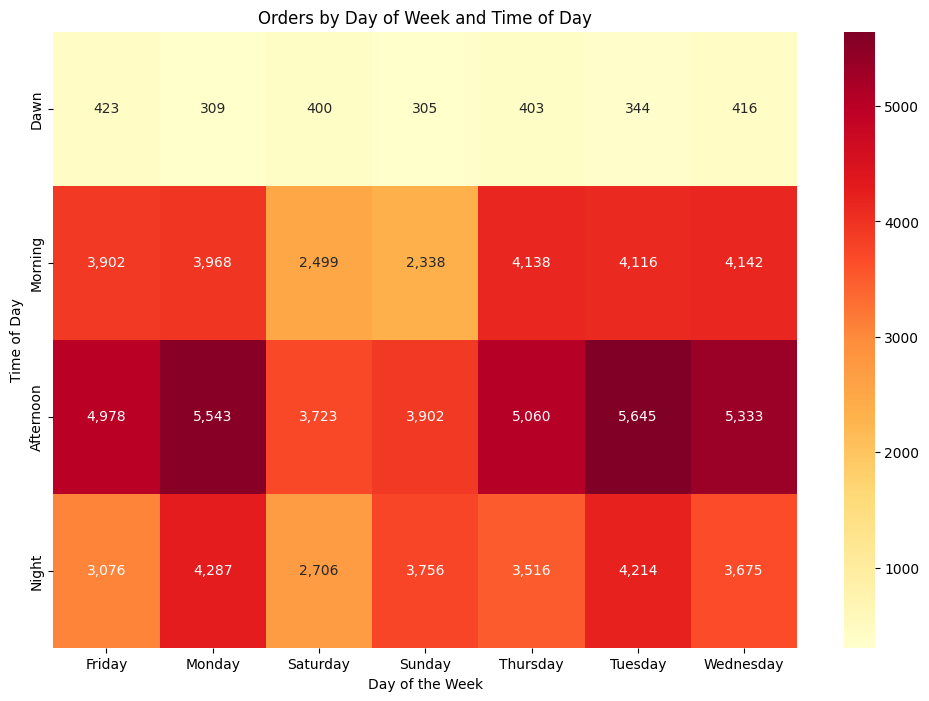

In [127]:
# create heatmap chart
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size
sns.heatmap(pivot_data, annot=True, fmt=',.0f', cmap='YlOrRd')

#Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Time of Day')
plt.title('Orders by Day of Week and Time of Day')

plt.show()

# **summarize**
 + As we see The most ordered is on Tuesday afternon
 And The least ordered is on Sunday Dawn
 + The most ordered is happen in Afternoon and The least ordered is happen in Dawn
